# World-population-data-analysis-beginner

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
!pip install jovian opendatasets --upgrade --quiet

In [4]:
dataset_url = 'https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sankhadeepkundu
Your Kaggle Key: ········


100%|██████████| 17.1k/17.1k [00:00<00:00, 12.1MB/s]

In [6]:
data_dir = './world-population-dataset'
import os
os.listdir(data_dir)

['world_population.csv', 'List of the Countries and Territories.txt']

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
population_df = pd.read_csv('world-population-dataset/world_population.csv')
population_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [9]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [26]:
population_df.rename(columns = {'Density (per km²)':'Density (per sq. km)'}, inplace = True)
population_df.rename(columns = {'Area (km²)':'Area (sq. km)'}, inplace = True)
population_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (sq. km),Density (per sq. km),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [27]:
sorted_population = population_df.sort_values(by = 'Rank').reset_index(drop=True)

**NOTE:** <br />
*reset_index* is used to reset the original data frame index starting from 0.<br />
The indexing got disrupted due to *sort_values*.

I don't know exactly what *drop* attribute does, but i know how it is helping me, if you can explain please let me know.

In [28]:
sorted_population

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (sq. km),Density (per sq. km),Growth Rate,World Population Percentage
0,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
1,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
2,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
3,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
4,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,Brades,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
230,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
231,232,NIU,Niue,Alofi,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
232,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00


### Q1. What is the name of the country with highest and lowest population?

In [29]:
print('The country with the highest population is',sorted_population['Country'].iloc[0],'and the country with the least population is',sorted_population['Country'].iloc[len(population_df.index)-1])

The country with the highest population is China and the country with the least population is Vatican City


### Q2. List the top 20 populous countries.

In [52]:
top_20 = sorted_population.head(20)[['Rank','CCA3','Country','Capital','Continent','2020 Population','Density (per sq. km)']]
top_20

,Rank,CCA3,Country,Capital,Continent,2020 Population,Density (per sq. km)
0,1,CHN,China,Beijing,Asia,1424929781,146.8933
1,2,IND,India,New Delhi,Asia,1396387127,431.0675
2,3,USA,United States,"Washington, D.C.",North America,335942003,36.0935
3,4,IDN,Indonesia,Jakarta,Asia,271857970,144.6529
4,5,PAK,Pakistan,Islamabad,Asia,227196741,267.4018
5,6,NGA,Nigeria,Abuja,Africa,208327405,236.5759
6,7,BRA,Brazil,Brasilia,South America,213196304,25.2841
7,8,BGD,Bangladesh,Dhaka,Asia,167420951,1160.0350
8,9,RUS,Russia,Moscow,Europe,145617329,8.4636
9,10,MEX,Mexico,Mexico City,North America,125998302,64.9082


In [31]:
sr = top_20.Continent.value_counts()
sr_df = pd.DataFrame({'Continent' : sr.index, 'Count' : sr.values})

In [32]:
sr_df

,Continent,Count
0,Asia,11
1,Africa,4
2,North America,2
3,Europe,2
4,South America,1


### Continent-wise distribution of top 10 populous countries.

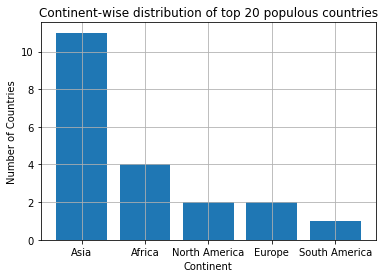

In [33]:
plt.figure(figsize=(6,4))
plt.title('Continent-wise distribution of top 20 populous countries')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.bar(sr_df.Continent,sr_df.Count);

### Density Visualisation of 20 most populous countries.

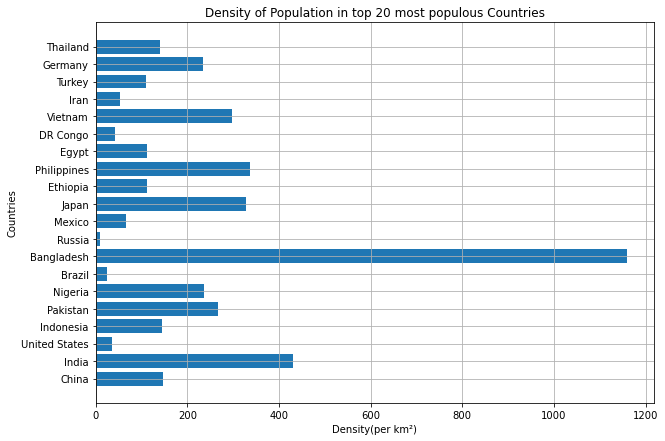

In [34]:
plt.figure(figsize=(10,7))
plt.title('Density of Population in top 20 most populous Countries')
plt.xlabel('Density(per km²)')
plt.ylabel('Countries')
plt.grid(True)
x = top_20['Density (per sq. km)']
y = top_20.Country
plt.barh(y,x);

We see that Bangladesh has exceptionally high density even while Russia has exceptionally low density of population.<br />This can tell us that the amount of land in the countries.

Let's have a look at the Area of Land in the above countries.

In [38]:
top_20_area_df = sorted_population.head(20)[['Area (sq. km)']]
top_20_area_df

,Area (sq. km)
0,9706961
1,3287590
2,9372610
3,1904569
4,881912
5,923768
6,8515767
7,147570
8,17098242
9,1964375


##### Complete Details :--

In [48]:
top_20.insert(7, 'Area (sq. km)', top_20_area_df['Area (sq. km)'])
top_20

,Rank,CCA3,Country,Capital,Continent,2020 Population,Density (per sq. km),Area (sq. km)
0,1,CHN,China,Beijing,Asia,1424929781,146.8933,9706961
1,2,IND,India,New Delhi,Asia,1396387127,431.0675,3287590
2,3,USA,United States,"Washington, D.C.",North America,335942003,36.0935,9372610
3,4,IDN,Indonesia,Jakarta,Asia,271857970,144.6529,1904569
4,5,PAK,Pakistan,Islamabad,Asia,227196741,267.4018,881912
5,6,NGA,Nigeria,Abuja,Africa,208327405,236.5759,923768
6,7,BRA,Brazil,Brasilia,South America,213196304,25.2841,8515767
7,8,BGD,Bangladesh,Dhaka,Asia,167420951,1160.0350,147570
8,9,RUS,Russia,Moscow,Europe,145617329,8.4636,17098242
9,10,MEX,Mexico,Mexico City,North America,125998302,64.9082,1964375


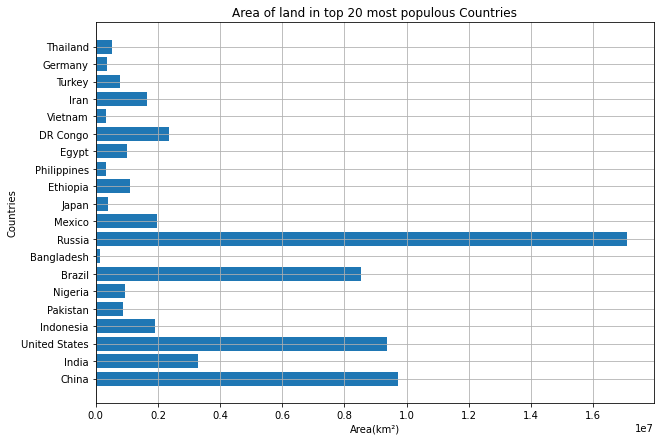

In [49]:
plt.figure(figsize=(10,7))
plt.title('Area of land in top 20 most populous Countries')
plt.xlabel('Area(km²)')
plt.ylabel('Countries')
plt.grid(True)
x = top_20['Area (sq. km)']
y = top_20.Country
plt.barh(y,x);

So, we see that Russia has the highest landmass while Bangladesh has the least landmass among the top 20 most populous country.<br />
Hence, the it explains the reason of the population density record.

### Let us see the country with the highest landmass and the country with the least landmass.

In [56]:
sorted_by_area_df = population_df.sort_values(by = 'Area (sq. km)', ascending = False)
sorted_by_area_df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (sq. km),Density (per sq. km),Growth Rate,World Population Percentage
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81
35,39,CAN,Canada,Ottawa,North America,38454327,37888705,35732126,33963412,30683313,27657204,24511510,21434577,9984670,3.8513,1.0078,0.48
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,228,BLM,Saint Barthelemy,Gustavia,North America,10967,10681,9643,8988,7082,5168,2983,2417,21,522.2381,1.0098,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00
76,219,GIB,Gibraltar,Gibraltar,Europe,32649,32709,32520,31262,27741,27317,28734,26685,6,5441.5000,0.9994,0.00
134,217,MCO,Monaco,Monaco,Europe,36469,36922,36760,33178,32465,30329,27076,24270,2,18234.5000,0.9941,0.00


In [58]:
print("The country with the largest landmass is",sorted_by_area_df['Country'].iloc[0],"and the one with the least landmass is",sorted_by_area_df['Country'].iloc[len(sorted_by_area_df.index)-1])

The country with the largest landmass is Russia and the one with the least landmass is Vatican City


**We see that Vatican City is the country with the least landmass and also the least population.**

In [65]:
continent_area = sorted_by_area_df.groupby('Continent')[['1970 Population', 'Area (sq. km)']].sum()
continent_area

,1970 Population,Area (sq. km)
Continent,,
Africa,365444348,30317963
Asia,2144906290,32138141
Europe,655923991,23010411
North America,315434606,24244178
Oceania,19480270,8515081
South America,192947156,17833382


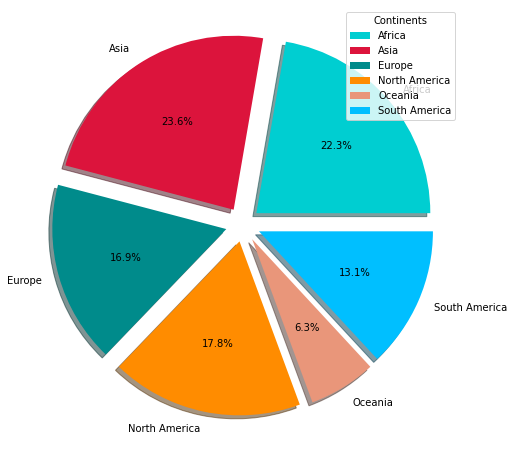

In [72]:
plt.figure(figsize = (12,8))
plt.pie(continent_area['Area (sq. km)'], autopct='%1.1f%%', labels = continent_area.index, explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1), shadow = True, colors = ['#00CED1', '#DC143C', '#008B8B', '#FF8C00', '#E9967A', '#00BFFF'])
plt.legend(title = 'Continents');

#### So, it's clearly visible that Asia is the largest continent followed by Africa and North America.

In [74]:
country_count = sorted_by_area_df.groupby('Continent')[['Country']].count()
country_count

,Country
Continent,
Africa,57
Asia,50
Europe,50
North America,40
Oceania,23
South America,14


### Number of countries in every continent :--

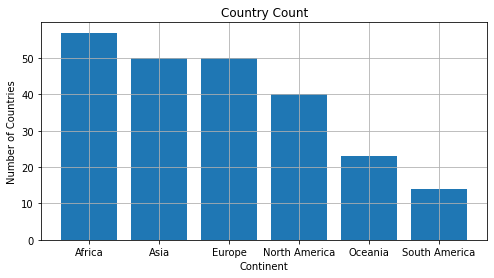

In [76]:
plt.figure(figsize=(8,4))
plt.title('Country Count')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.bar(country_count.index,country_count.Country);

#### For ease of visualisation , let us check the population rise in South America.<br />
South America has the least number of countries in this dataset.